# Binary Classification of Algerian Forest Fires Dataset 
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 

## 1) Problem statement.
- The dataset includes 244 instances that regroup a data of two regions of Algeria
- We have to classify Fire or Not Fire from given features

## 2) Data Collection.
* The Dataset is collected from uci machine learning repository (https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++)
* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.
* 122 instances for each region.
* The dataset includes 11 attribues and 1 output attribute (class)

## 2.1 Import Data and Required Packages

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [51]:
df = pd.read_csv(r"E:\PER\DATA SCIENCE\Ineuron\Machine Learning\Linear Regression\Algerian_forest_fires_dataset_UPDATE.csv", skiprows=[0,124,125,126])

**Attribute Information:**

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

### Top 5 records in dataset

In [52]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### Last 5 records in dataset

In [53]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


### Sample 5 records in dataset

In [54]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
56,27,7,2012,36,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3,fire
138,17,6,2012,31,69,17,4.7,62.2,3.9,8,1.1,3.8,0.4,not fire
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
93,2,9,2012,22,86,15,10.1,30.5,0.7,7,0.0,1.1,0,not fire


### Dataype in dataset

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


### Observations

1. there are missing values in Classes column
2. FWI column has data type as object
3. DC column has data type as object

## 3. Data Cleaning


In [56]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [57]:
# handling FWI row having alphabetical values

In [58]:
df[df['FWI'] == 'fire   ']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [59]:
df.iloc[165]

day                 14
month                7
year              2012
Temperature         37
 RH                 37
 Ws                 18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 165, dtype: object

In [60]:
# dropping row having alphabetical values
df = df.drop(df.index[165])

In [61]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [62]:
df['FWI'].str.isnumeric().sum()

28

In [63]:
# coverting datatype to float
df['FWI'] = df['FWI'].astype('float')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(6), int64(6), object(2)
memory usage: 28.5+ KB


In [65]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [66]:
df['DC'].str.isnumeric().sum()

27

In [67]:
df['DC'].value_counts()

8        5
7.6      4
7.8      4
8.4      4
7.5      4
        ..
92.5     1
90.4     1
100.7    1
110.9    1
16.5     1
Name: DC, Length: 197, dtype: int64

In [68]:
df['DC'].str.isalpha().sum()

0

In [69]:
# coverting datatype to float
df['DC'] = df['DC'].astype('float')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 28.5+ KB


In [71]:
# handling missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [72]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


### Observations
1. year column has 0 standard deviation
2. Rain, DC column has very high max value, looks like presence of outliers

### Check for duplicates

In [73]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [74]:
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521


In [75]:
df['year'].unique()

array([2012], dtype=int64)

### Checking Distribution of Numerical Features

In [76]:
df.columns[:-1].shape

(13,)

In [77]:
df[df.columns[0]]

0       1
1       2
2       3
3       4
4       5
       ..
239    26
240    27
241    28
242    29
243    30
Name: day, Length: 243, dtype: int64

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


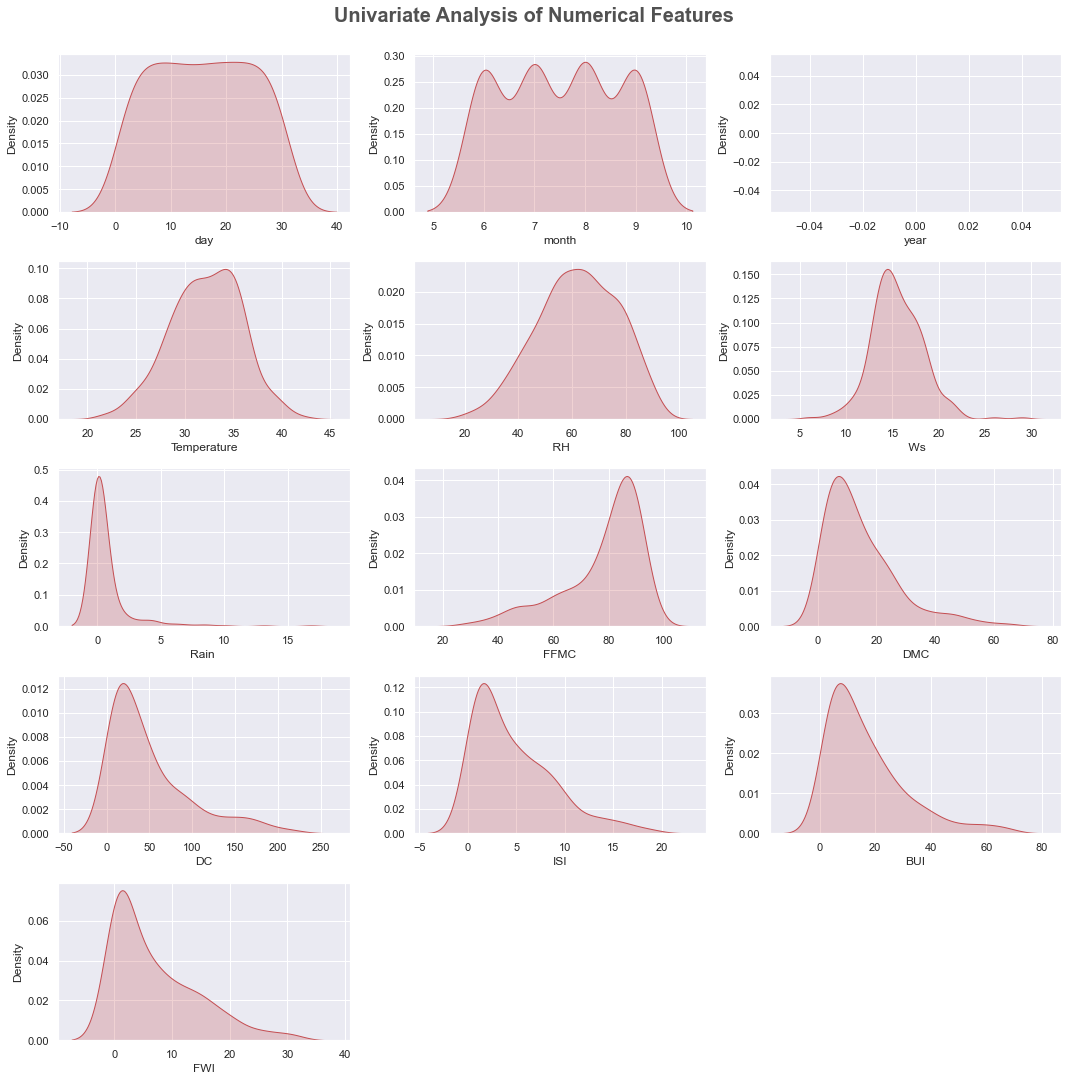

In [78]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df.columns[:-1])):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[df.columns[i]],shade=True, color='r')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

### Observations:
- Year column has constant value of 2012 so no distribution
- Rain,DMC, DC, ISI, BUI, FWI are right skewed
- FFMC left skewed
- There are outliers in Rain, FFMC, DC, ISI, BUI, FWI

In [79]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [83]:
df['Classes  '] = df['Classes  '].str.strip()

<AxesSubplot:xlabel='Classes  ', ylabel='count'>

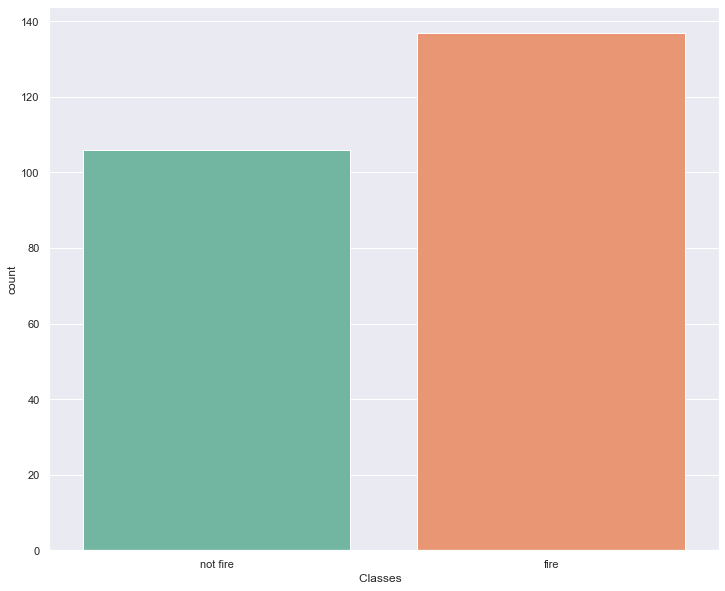

In [84]:
sns.countplot(data = df, x = 'Classes  ', palette='Set2')

# Check for Outliers

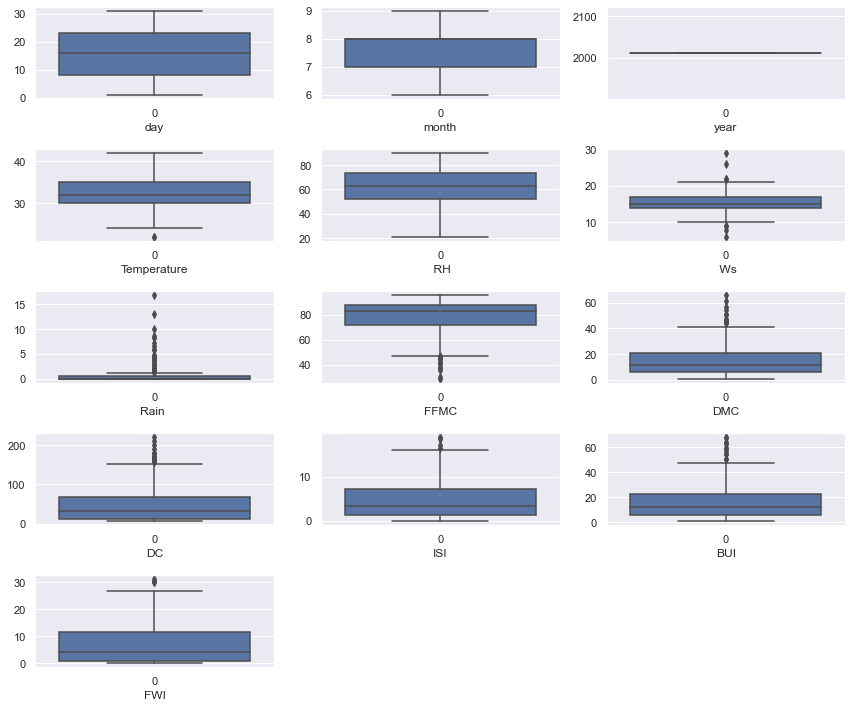

In [100]:
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(5,3,i+1)
    sns.boxplot(data = df[col])
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [101]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [105]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [107]:
replace_with_thresholds(df, df.columns[:-1])

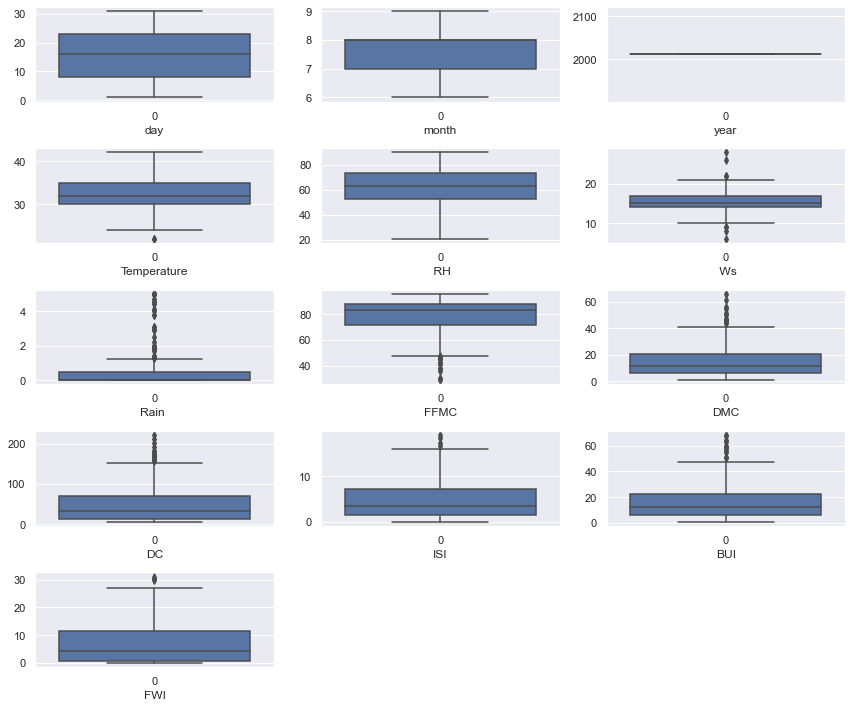

In [108]:
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(5,3,i+1)
    sns.boxplot(data = df[col])
    plt.xlabel(df.columns[i])
    plt.tight_layout()

#### Insights
- As we can see from above boxplots outliers are not removed properly

### Interquartile Range Method( IQR ) method

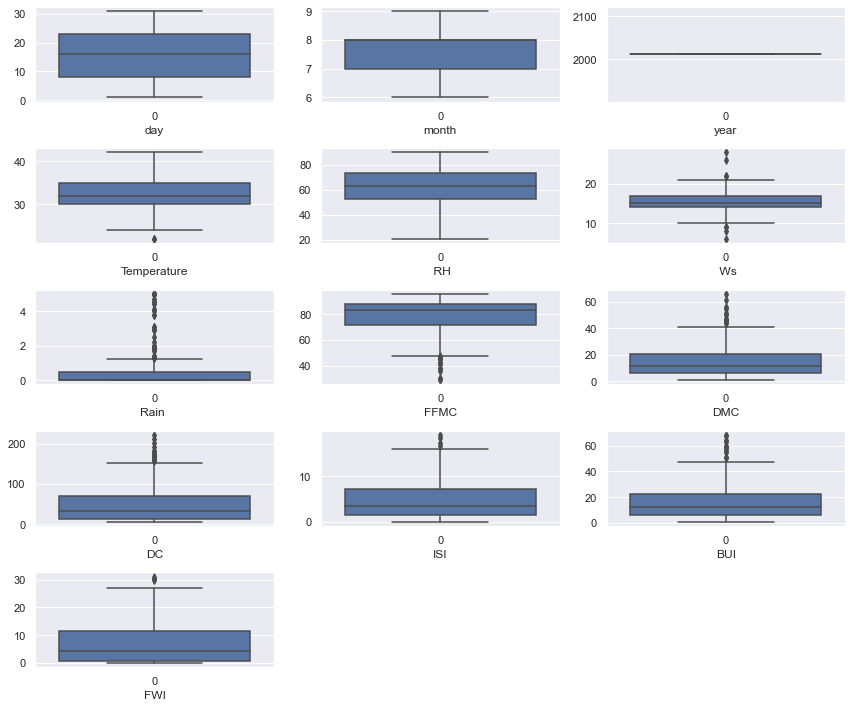

In [113]:
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(5,3,i+1)
    sns.boxplot(data = df[col])
    plt.xlabel(df.columns[i])
    plt.tight_layout()

In [114]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [116]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [117]:
remove_outliers_IQR('Rain ')

percentile25 0.0
percentile75 0.5
Upper limit 1.25
Lower limit -0.75


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [118]:
remove_outliers_IQR('FFMC')

percentile25 71.85
percentile75 88.3
Upper limit 112.975
Lower limit 47.17499999999999


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [119]:
remove_outliers_IQR('DMC')

percentile25 5.8
percentile75 20.799999999999997
Upper limit 43.29999999999999
Lower limit -16.699999999999992


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [143]:
remove_outliers_IQR('DC')

percentile25 12.35
percentile75 69.1
Upper limit 154.22499999999997
Lower limit -72.77499999999999


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [144]:
remove_outliers_IQR('BUI')

percentile25 6.0
percentile75 22.65
Upper limit 47.625
Lower limit -18.974999999999998


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [145]:
remove_outliers_IQR('ISI')

percentile25 1.4
percentile75 7.25
Upper limit 16.025
Lower limit -7.374999999999998


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [146]:
remove_outliers_IQR('FWI')

percentile25 0.7
percentile75 11.45
Upper limit 27.575
Lower limit -15.425


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [136]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(data=df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(data=df1[column])

    plt.show()

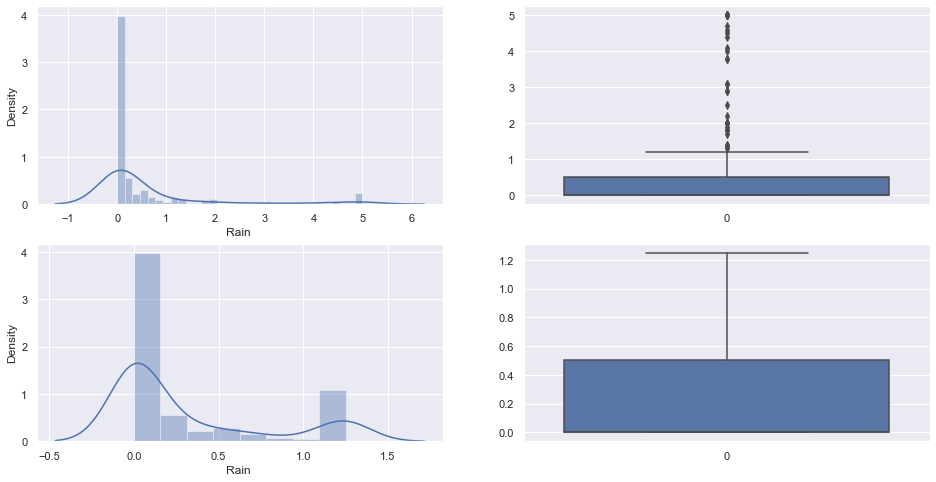

In [139]:
create_comparison_plot(df,df1,'Rain ')

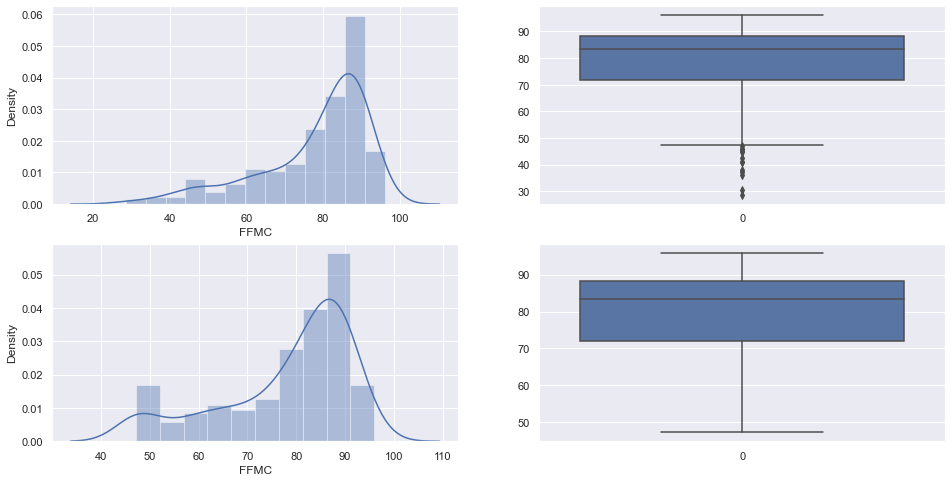

In [140]:
create_comparison_plot(df,df1,'FFMC')

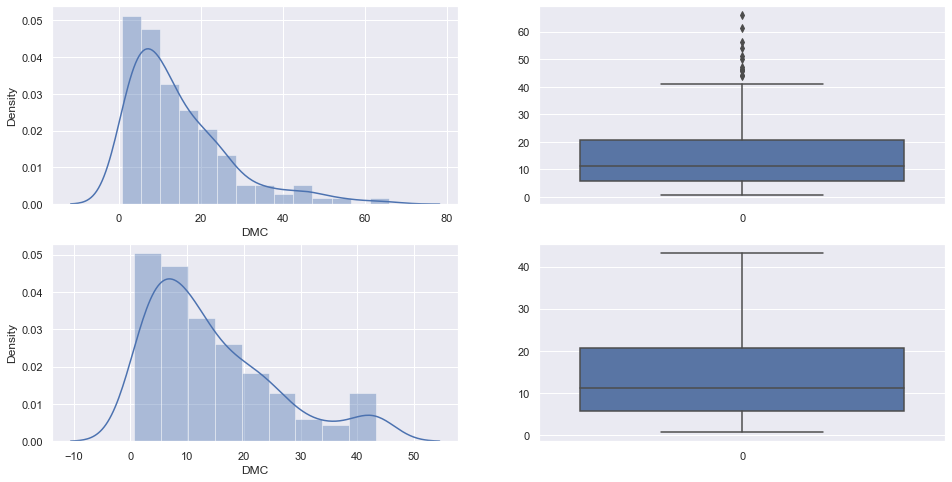

In [141]:
create_comparison_plot(df,df1,'DMC')

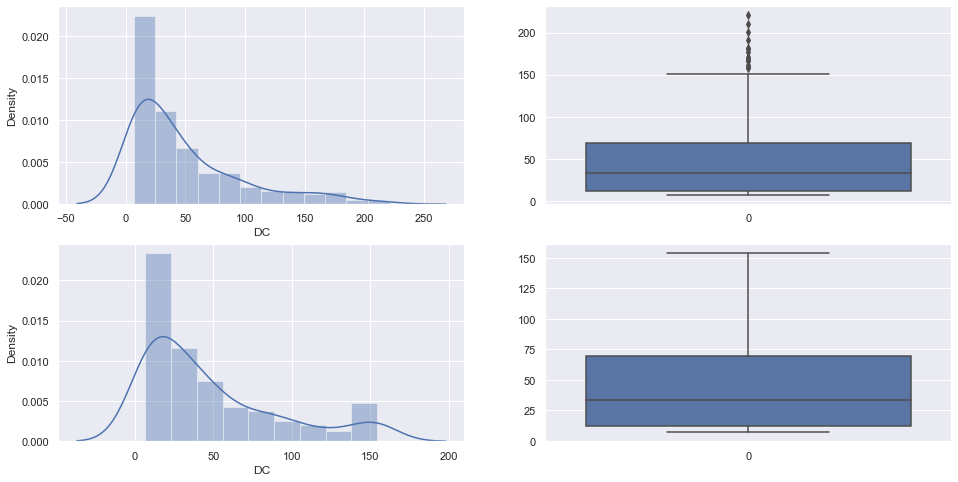

In [147]:
create_comparison_plot(df,df1,'DC')

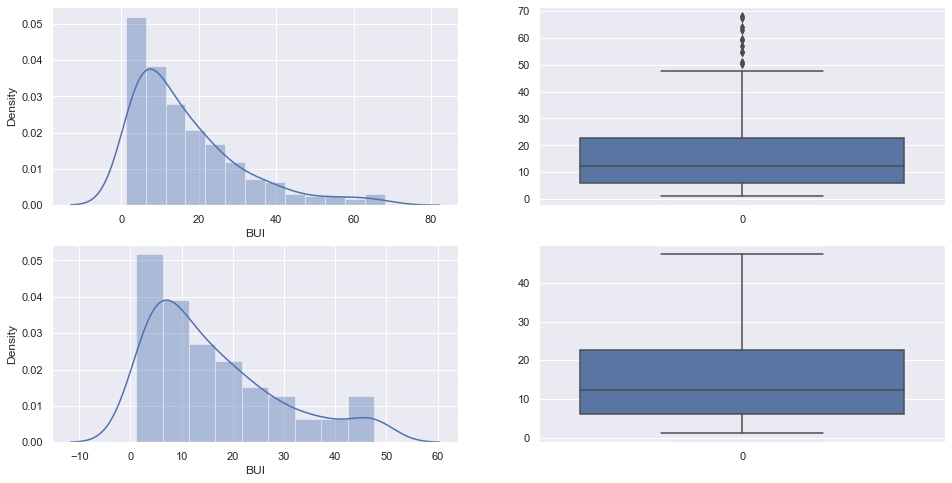

In [148]:
create_comparison_plot(df,df1,'BUI')

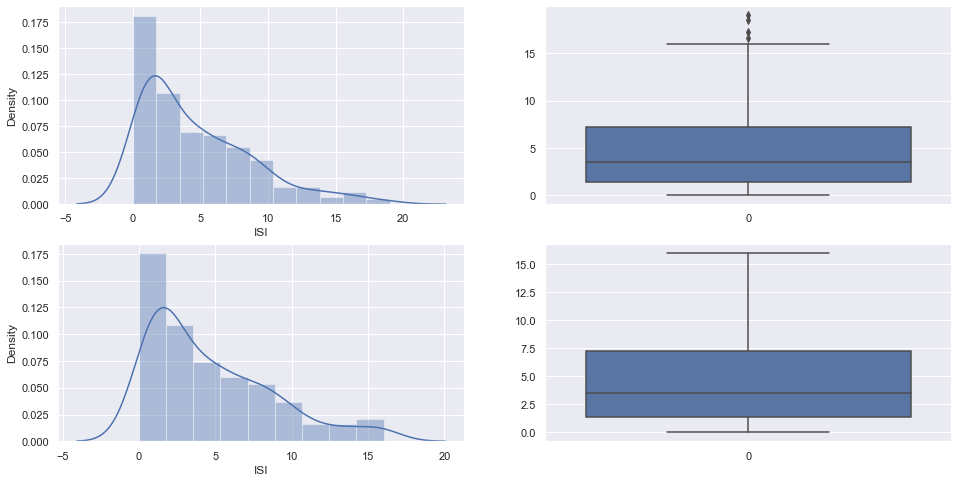

In [149]:
create_comparison_plot(df,df1,'ISI')

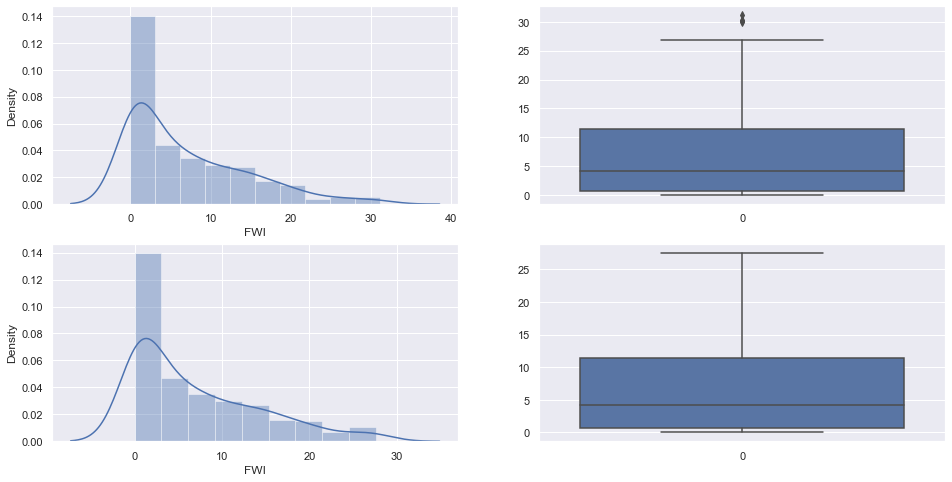

In [150]:
create_comparison_plot(df,df1,'FWI')

### Compare Skeness after outlier handling

In [151]:
df.skew()

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
 RH           -0.242790
 Ws            0.474397
Rain           2.519901
FFMC          -1.320130
DMC            1.522983
DC             1.473460
ISI            1.140243
BUI            1.452745
FWI            1.147593
dtype: float64

In [152]:
df1.skew()

day            0.000365
month         -0.005207
year           0.000000
Temperature   -0.191327
 RH           -0.242790
 Ws            0.474397
Rain           1.241294
FFMC          -1.082654
DMC            1.091065
DC             1.184410
ISI            1.031482
BUI            1.024216
FWI            1.058205
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

### using dataframe df1 where outliers are removed

### Handling Categorical Variables

In [162]:
df1['Classes  '].unique()

array(['not fire', 'fire'], dtype=object)

In [165]:
df1['Classes  '] = df1['Classes  '].replace(['not fire','fire'], [0,1]) 

In [166]:
df1['Classes  ']

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes  , Length: 243, dtype: int64

# 4. Feature Selection

### 1. Variance Threshold

In [155]:
from sklearn.feature_selection import VarianceThreshold

In [167]:
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df1)

VarianceThreshold(threshold=0)

In [168]:
variance_threshold.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### finding colunns having zero standard deviation

In [169]:
constant_columns = [column for column in df1.columns if column not in df1.columns[variance_threshold.get_support()]]

In [170]:
constant_columns

['year']

In [171]:
df1 = df1.drop(constant_columns,axis=1)

In [172]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6.0,29,57.0,18,0.00,65.700,3.4,7.6,1.3,3.4,0.5,0
1,2,6.0,29,61.0,13,1.25,64.400,4.1,7.6,1.0,3.9,0.4,0
2,3,6.0,26,82.0,22,1.25,47.175,2.5,7.1,0.3,2.7,0.1,0
3,4,6.0,25,89.0,13,1.25,47.175,1.3,6.9,0.0,1.7,0.0,0
4,5,6.0,27,77.0,16,0.00,64.800,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9.0,30,65.0,14,0.00,85.400,16.0,44.5,4.5,16.9,6.5,1
240,27,9.0,28,87.0,15,1.25,47.175,6.5,8.0,0.1,6.2,0.0,0
241,28,9.0,27,87.0,28,0.50,47.175,3.5,7.9,0.4,3.4,0.2,0
242,29,9.0,24,54.0,18,0.10,79.700,4.3,15.2,1.7,5.1,0.7,0


<AxesSubplot:>

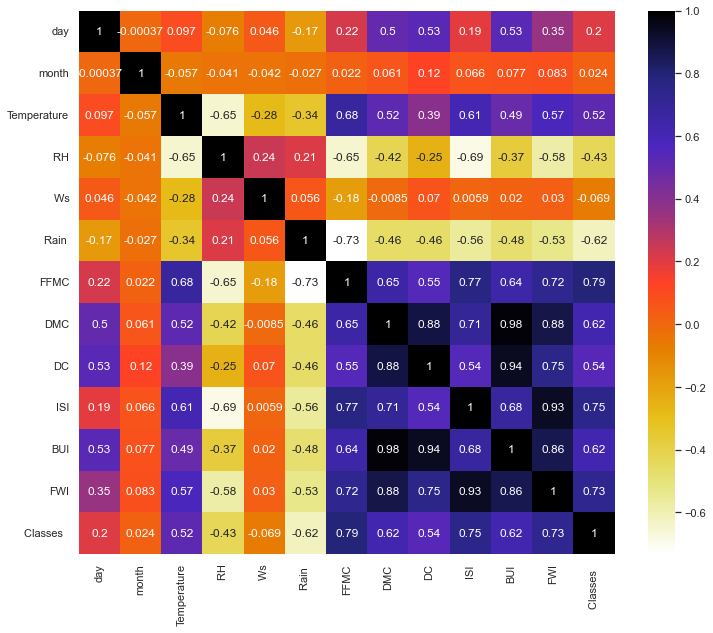

In [173]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df1.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [174]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [175]:
corr_features = correlation(df1, 0.85)
len(set(corr_features))

3

In [176]:
corr_features

{'BUI', 'DC', 'FWI'}

### removing columns highly correlated

In [177]:
df1 = df1.drop(corr_features,axis=1)

In [178]:
df1

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes
0,1,6.0,29,57.0,18,0.00,65.700,3.4,1.3,0
1,2,6.0,29,61.0,13,1.25,64.400,4.1,1.0,0
2,3,6.0,26,82.0,22,1.25,47.175,2.5,0.3,0
3,4,6.0,25,89.0,13,1.25,47.175,1.3,0.0,0
4,5,6.0,27,77.0,16,0.00,64.800,3.0,1.2,0
...,...,...,...,...,...,...,...,...,...,...
239,26,9.0,30,65.0,14,0.00,85.400,16.0,4.5,1
240,27,9.0,28,87.0,15,1.25,47.175,6.5,0.1,0
241,28,9.0,27,87.0,28,0.50,47.175,3.5,0.4,0
242,29,9.0,24,54.0,18,0.10,79.700,4.3,1.7,0


### Separating Independent and Dependent Features

In [180]:
X = df1.drop(columns='Classes  ')

In [184]:
y = df1['Classes  ']

In [185]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI
0,1,6.0,29,57.0,18,0.00,65.700,3.4,1.3
1,2,6.0,29,61.0,13,1.25,64.400,4.1,1.0
2,3,6.0,26,82.0,22,1.25,47.175,2.5,0.3
3,4,6.0,25,89.0,13,1.25,47.175,1.3,0.0
4,5,6.0,27,77.0,16,0.00,64.800,3.0,1.2
...,...,...,...,...,...,...,...,...,...
239,26,9.0,30,65.0,14,0.00,85.400,16.0,4.5
240,27,9.0,28,87.0,15,1.25,47.175,6.5,0.1
241,28,9.0,27,87.0,28,0.50,47.175,3.5,0.4
242,29,9.0,24,54.0,18,0.10,79.700,4.3,1.7


In [186]:
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes  , Length: 243, dtype: int64

### split data into training and test set

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaler = StandardScaler()

In [191]:
X_train = scaler.fit_transform(X_train)

In [192]:
X_test = scaler.transform(X_test)

### Model Training

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
log_reg = LogisticRegression()

In [195]:
log_reg.fit(X_train, y_train)

LogisticRegression()

### print coefficients and intercept

In [196]:
log_reg.coef_

array([[-0.07989874,  0.0250494 ,  0.19209349,  0.05062813,  0.096198  ,
        -0.21159796,  2.58685679,  0.83011909,  2.51743951]])

In [197]:
log_reg.intercept_

array([0.76607128])

In [199]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [200]:
y_pred = log_reg.predict(X_test)

# Performanc Matrix

In [209]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.98      0.98      0.98        44

    accuracy                           0.97        73
   macro avg       0.97      0.97      0.97        73
weighted avg       0.97      0.97      0.97        73



In [207]:
confusion_matrix(y_test, y_pred)

array([[28,  1],
       [ 1, 43]], dtype=int64)

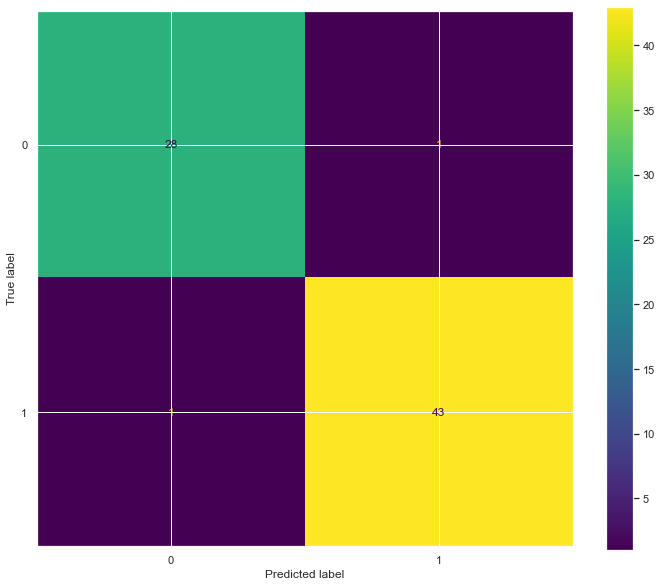

In [204]:
plot_confusion_matrix(log_reg, X_test, y_test )

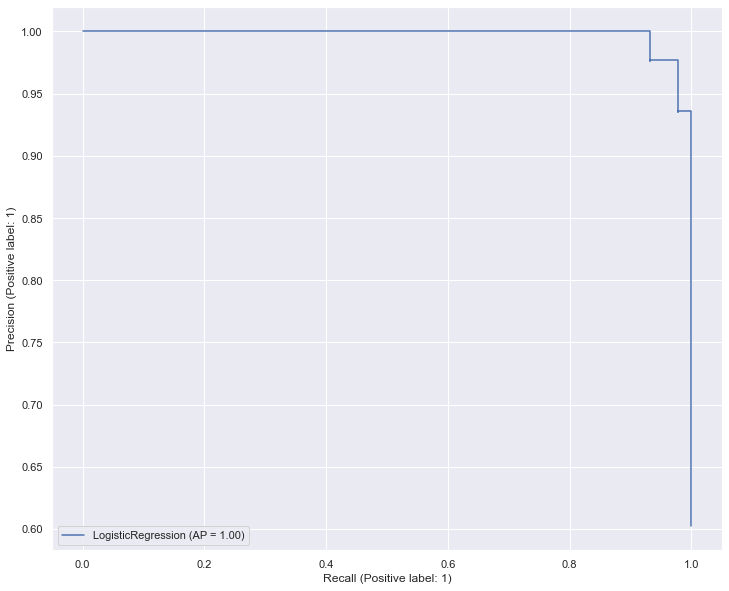

In [210]:
plot_precision_recall_curve(log_reg, X_test, y_test )

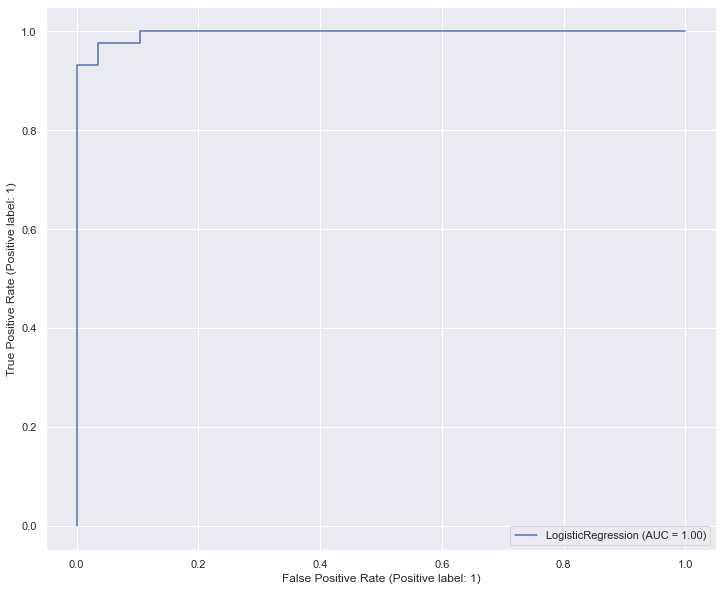

In [215]:
plot_roc_curve(log_reg, X_test, y_test)